<center class="alert alert-block alert-info"><h1>Stock Data Analysis</h1></center>

## IMPORTED libraries

In [149]:
# Package for analysis
import numpy as np
import pandas as pd

# Package for analysis
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn

## import csv file

In [150]:
stock = pd.read_csv("all_stocks_5yr.csv")
stock.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [151]:
stock.size

4333280

In [152]:
stock.shape

(619040, 7)

<hr>

<center class="alert alert-block alert-info"><h2> Null Value Handling </h2></center>

In [153]:
stock.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [154]:
stock_high_column_median = stock["high"].median()
stock_high_column_median

63.15

In [155]:
stock_low_column_median = stock["low"].median()
stock_low_column_median

62.02

In [156]:
stock["high"].fillna(stock_high_column_median,inplace=True)
stock["low"].fillna(stock_low_column_median,inplace=True)

In [157]:
stock.dropna(inplace=True)
stock.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

<hr/>

<center class="alert alert-block alert-info"><h2> Exploratory Data Analysis </h2></center>

In [158]:
stock.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [159]:
stock.describe()

,open,high,low,close,volume
count,619029.000000,619029.000000,619029.000000,619029.000000,6.190290e+05
mean,83.023334,83.778419,82.256200,83.043305,4.321892e+06
std,97.378769,98.207735,96.507634,97.388913,8.693671e+06
min,1.620000,1.690000,1.500000,1.590000,1.010000e+02
25%,40.220000,40.620000,39.830000,40.240800,1.070351e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082165e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284550e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [160]:
stock["dd"] = stock["date"].apply(lambda x:int(x[8:10]))
stock["mm"] = stock["date"].apply(lambda x:int(x[5:7]))
stock["yy"] = stock["date"].apply(lambda x:int(x[0:4]))
stock.head()

,date,open,high,low,close,volume,Name,dd,mm,yy
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,8,2,2013
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,11,2,2013
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,12,2,2013
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,13,2,2013
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,14,2,2013


<center class="alert alert-block alert-success"><h2> Analaysis of 2<sup>nd</sup> month of year:**2013** </h2></center>

In [161]:
# extrecting data
second_month_stock_data = stock[((stock["mm"]==4)&(stock["yy"]==2013))&(stock["Name"]=="AAL")]
second_month_stock_data.head()

,date,open,high,low,close,volume,Name,dd,mm,yy
34,2013-04-01,17.02,17.13,16.54,16.67,5222300,AAL,1,4,2013
35,2013-04-02,16.48,16.50,15.71,15.74,14595600,AAL,2,4,2013
36,2013-04-03,15.82,15.92,15.13,15.53,14658300,AAL,3,4,2013
37,2013-04-04,15.12,15.71,15.12,15.69,5520300,AAL,4,4,2013
38,2013-04-05,15.17,15.79,15.03,15.72,5252300,AAL,5,4,2013


In [162]:
second_month_stock_data.reset_index(inplace=True)
second_month_stock_data.head()

,index,date,open,high,low,close,volume,Name,dd,mm,yy
0,34,2013-04-01,17.02,17.13,16.54,16.67,5222300,AAL,1,4,2013
1,35,2013-04-02,16.48,16.50,15.71,15.74,14595600,AAL,2,4,2013
2,36,2013-04-03,15.82,15.92,15.13,15.53,14658300,AAL,3,4,2013
3,37,2013-04-04,15.12,15.71,15.12,15.69,5520300,AAL,4,4,2013
4,38,2013-04-05,15.17,15.79,15.03,15.72,5252300,AAL,5,4,2013


In [163]:
second_month_stock_data["s_no"]=second_month_stock_data.index
second_month_stock_data.head()

C:\Users\updes\AppData\Local\Temp\ipykernel_7304\3445408102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_month_stock_data["s_no"]=second_month_stock_data.index


,index,date,open,high,low,close,volume,Name,dd,mm,yy,s_no
0,34,2013-04-01,17.02,17.13,16.54,16.67,5222300,AAL,1,4,2013,0
1,35,2013-04-02,16.48,16.50,15.71,15.74,14595600,AAL,2,4,2013,1
2,36,2013-04-03,15.82,15.92,15.13,15.53,14658300,AAL,3,4,2013,2
3,37,2013-04-04,15.12,15.71,15.12,15.69,5520300,AAL,4,4,2013,3
4,38,2013-04-05,15.17,15.79,15.03,15.72,5252300,AAL,5,4,2013,4


In [164]:
second_month_stock_data.shape

(22, 12)

In [165]:
second_month_stock_data[["open","high","low","close"]].corr()

,open,high,low,close
open,1.000000,0.814836,0.881575,0.572019
high,0.814836,1.000000,0.881114,0.862029
low,0.881575,0.881114,1.000000,0.828911
close,0.572019,0.862029,0.828911,1.000000


<Axes: >

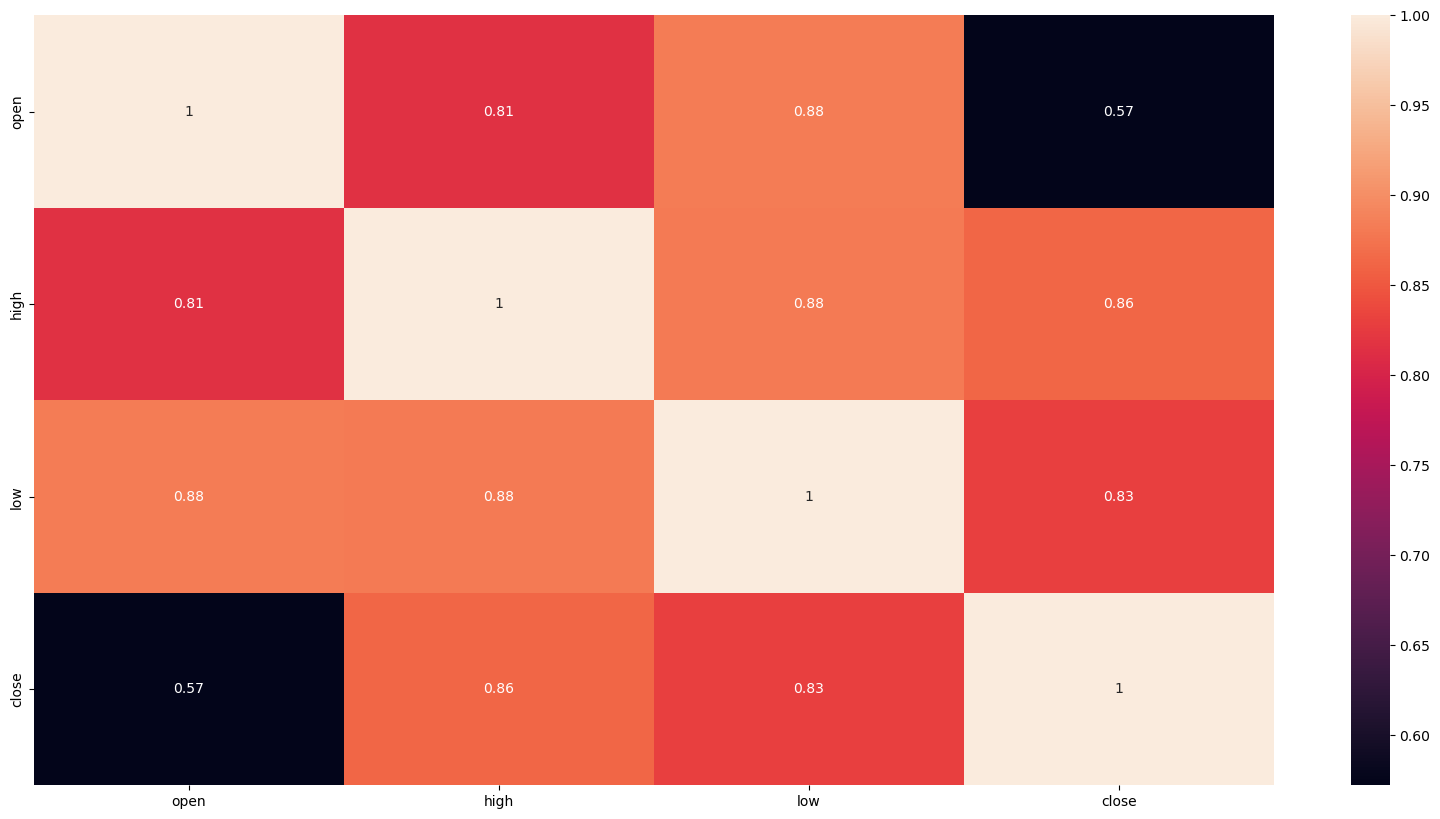

In [166]:
sns.heatmap(second_month_stock_data[["open","high","low","close"]].corr(),annot=True)

<Axes: >

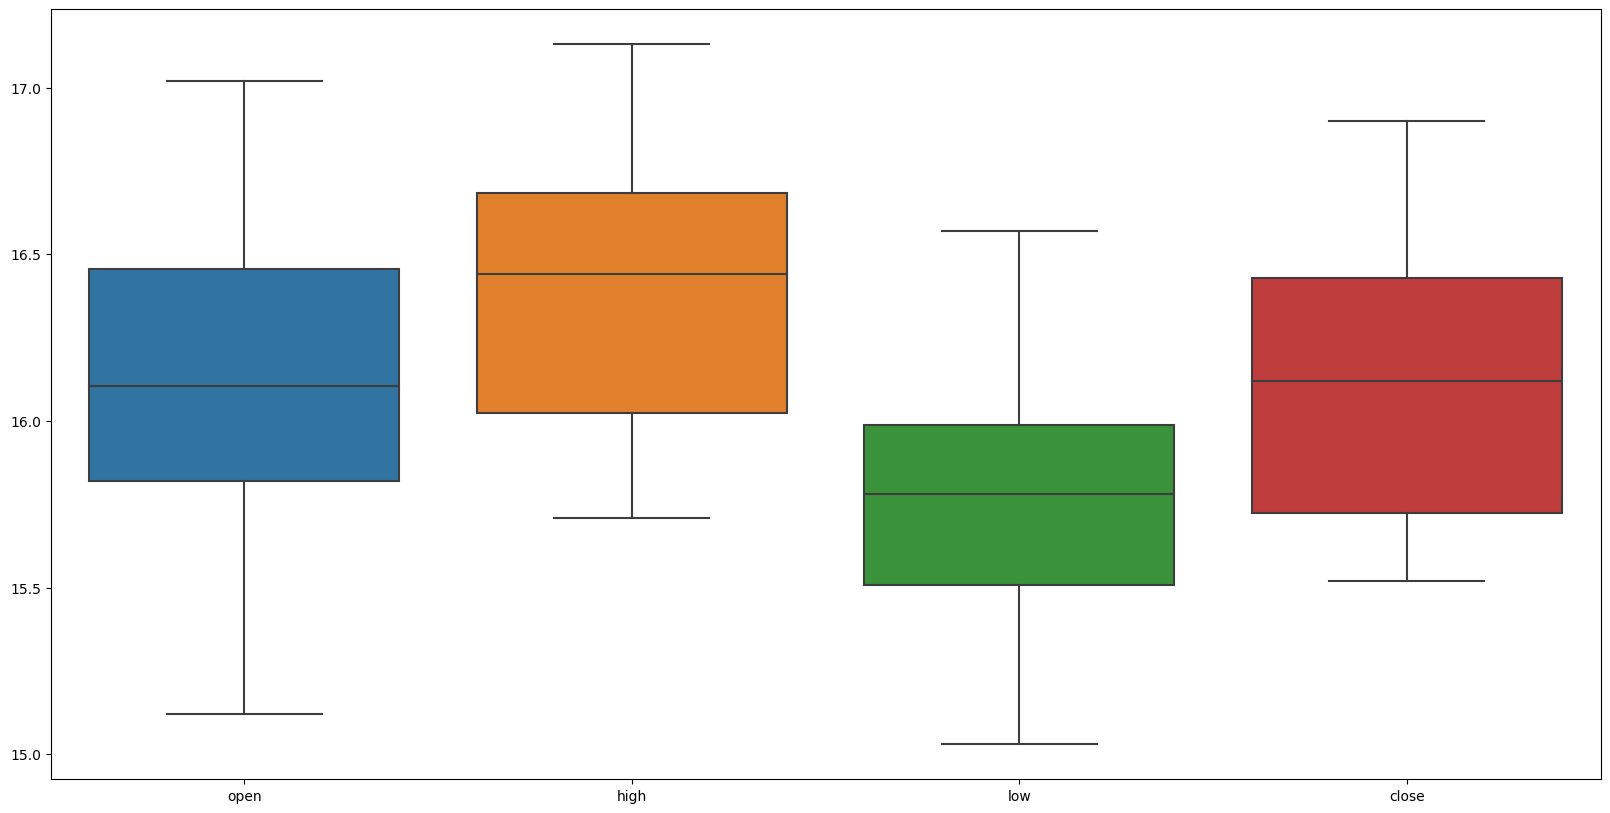

In [167]:
sns.boxplot(second_month_stock_data.iloc[:,2:6])

<Axes: xlabel='close', ylabel='Count'>

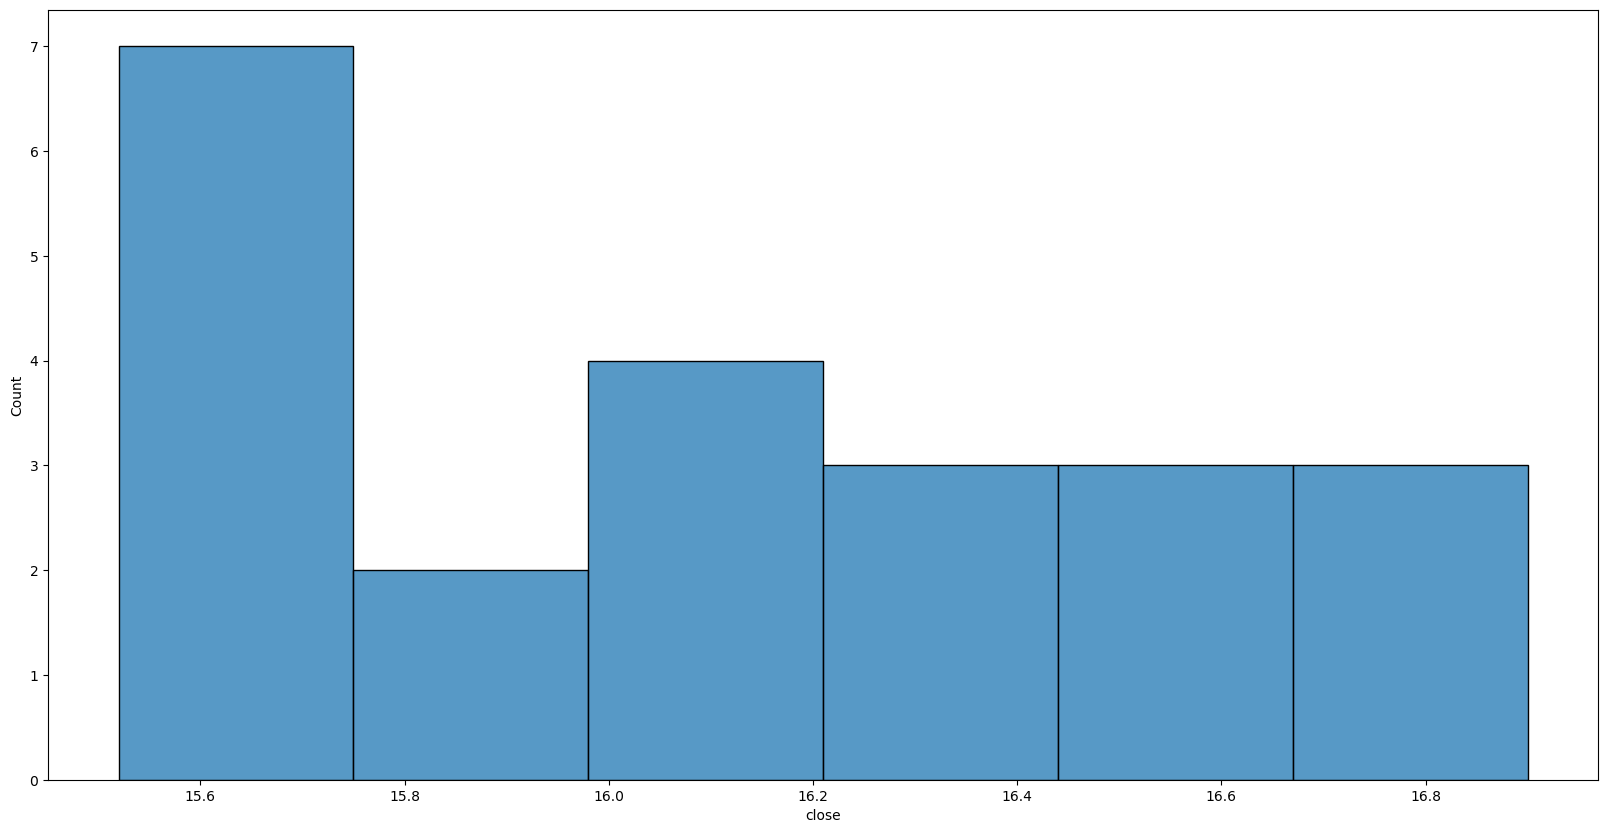

In [168]:
sns.histplot(second_month_stock_data["close"])

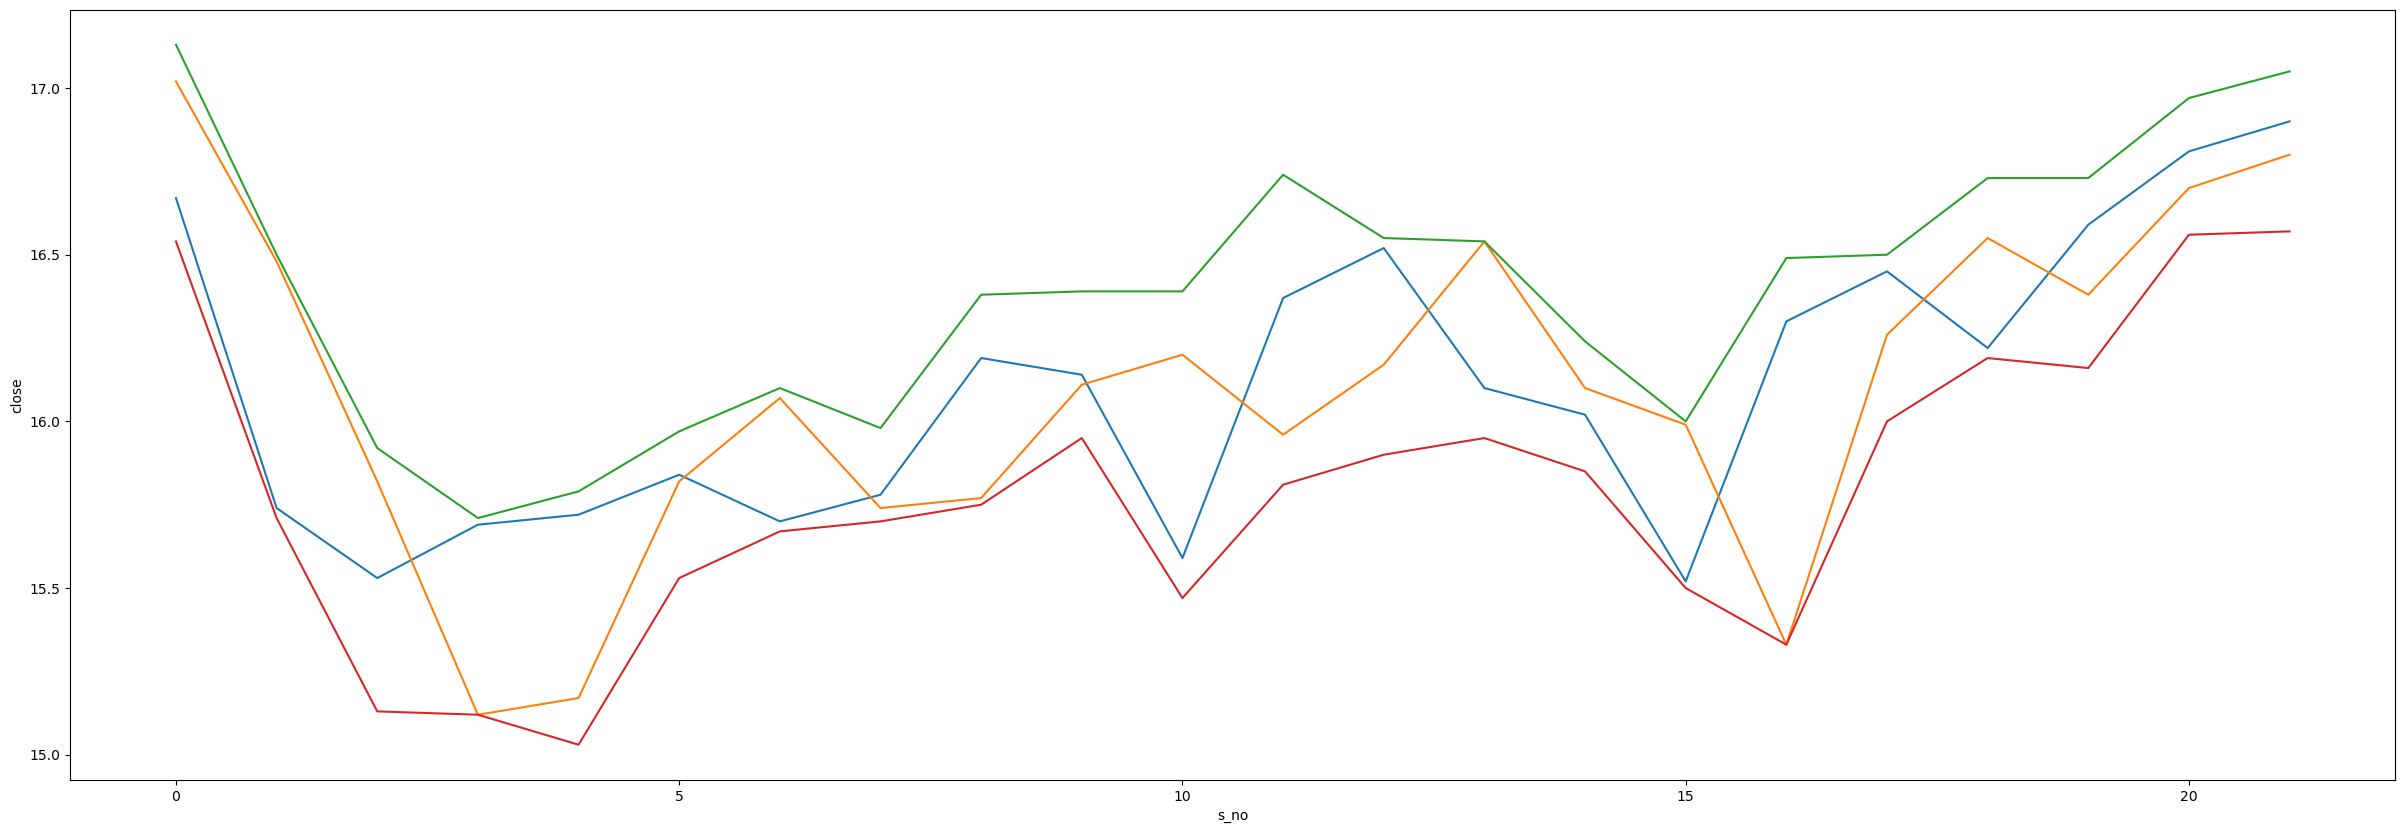

In [169]:
plt.rcParams["figure.figsize"] = (30,10)
second_month_stock_data_closecolumn=sns.lineplot(data=second_month_stock_data,x="s_no", y="close")
# for i, v in enumerate(second_month_stock_data["close"]):
#     second_month_stock_data_closecolumn.text(i, v, "%d" %v, ha="center")
    
second_month_stock_data_opencolumn=sns.lineplot(data=second_month_stock_data,x="s_no", y="open")
# for i, v in enumerate(second_month_stock_data["open"]):
#     second_month_stock_data_opencolumn.text(i, v, "%d" %v, ha="center")
    
second_month_stock_data_highcolumn=sns.lineplot(data=second_month_stock_data,x="s_no", y="high")
# for i, v in enumerate(second_month_stock_data["high"]):
#     second_month_stock_data_highcolumn.text(i, v, "%d" %v, ha="center")
    
second_month_stock_data_lowcolumn=sns.lineplot(data=second_month_stock_data,x="s_no", y="low")
# for i, v in enumerate(second_month_stock_data["low"]):
#     second_month_stock_data_lowcolumn.text(i, v, "%d" %v, ha="center")

In [170]:
second_month_stock_data.head(3)

,index,date,open,high,low,close,volume,Name,dd,mm,yy,s_no
0,34,2013-04-01,17.02,17.13,16.54,16.67,5222300,AAL,1,4,2013,0
1,35,2013-04-02,16.48,16.50,15.71,15.74,14595600,AAL,2,4,2013,1
2,36,2013-04-03,15.82,15.92,15.13,15.53,14658300,AAL,3,4,2013,2


In [171]:
x=second_month_stock_data[["s_no"]]
y=second_month_stock_data["close"]

In [172]:
from sklearn import linear_model
second_month_stock_data_model = linear_model.LinearRegression()
second_month_stock_data_model.fit(x,y)

LinearRegression()

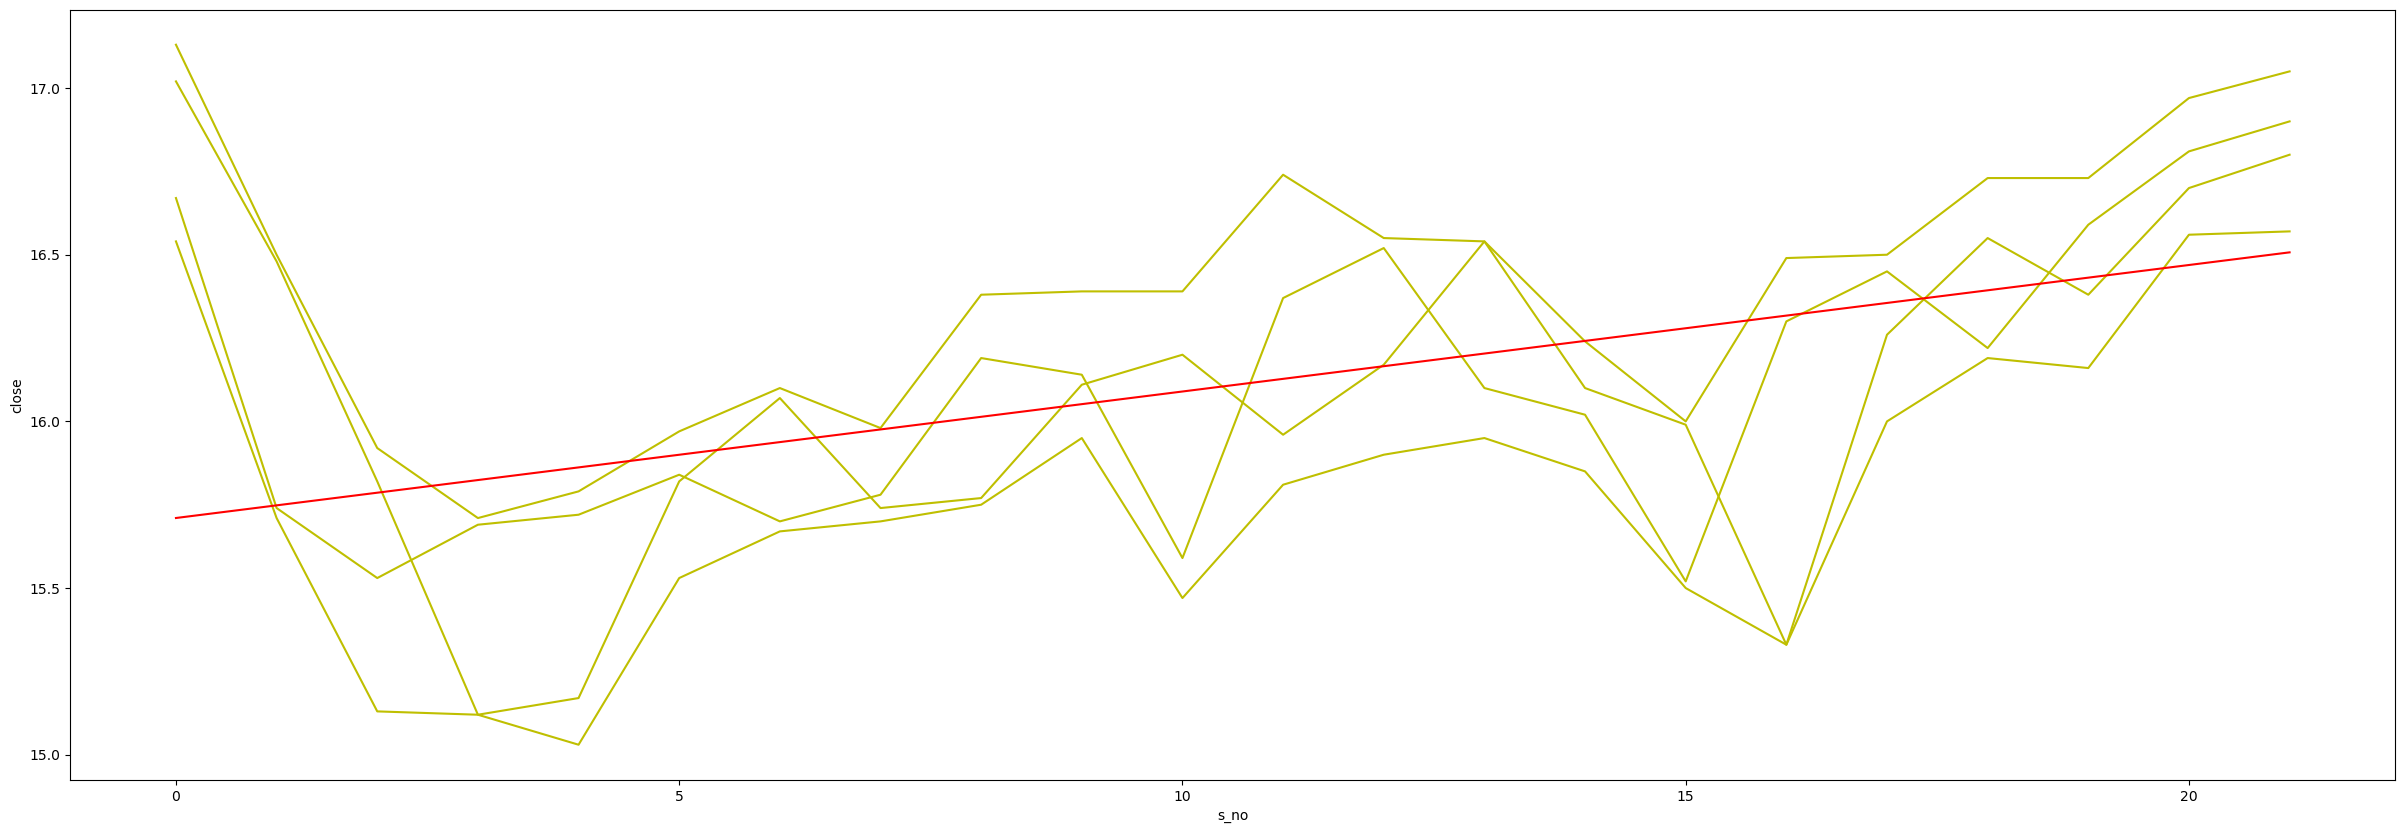

In [173]:
plt.rcParams["figure.figsize"] = (30,10)
second_month_stock_data_closecolumn=sns.lineplot(data=second_month_stock_data,x="s_no", y="close",c="y")
second_month_stock_data_opencolumn=sns.lineplot(data=second_month_stock_data,x="s_no", y="open",c="y")
second_month_stock_data_highcolumn=sns.lineplot(data=second_month_stock_data,x="s_no", y="high",c="y")
second_month_stock_data_lowcolumn=sns.lineplot(data=second_month_stock_data,x="s_no", y="low",c="y")
plt.plot(second_month_stock_data["s_no"],second_month_stock_data_model.predict(x),c="r")

<center class="alert alert-block alert-success"><h2> Analaysis of 6 month of year:<b>2013</b> </h2></center>

In [174]:
# extrecting data
Half_Yearly_stock=stock[((stock.mm>3)&(stock.mm<10)&(stock.yy==2014))&(stock["Name"]=="AAL")]
Half_Yearly_stock.head()

,date,open,high,low,close,volume,Name,dd,mm,yy
287,2014-04-01,36.95,38.19,36.8500,37.94,11065541,AAL,1,4,2014
288,2014-04-02,38.24,38.90,37.4800,37.71,12508405,AAL,2,4,2014
289,2014-04-03,37.72,38.44,36.9600,37.34,7939297,AAL,3,4,2014
290,2014-04-04,37.41,37.72,36.3001,36.56,8733197,AAL,4,4,2014
291,2014-04-07,36.78,37.48,35.4600,35.78,10577786,AAL,7,4,2014


In [175]:
Half_Yearly_stock.reset_index(inplace=True)
Half_Yearly_stock["sno"]=Half_Yearly_stock.index
Half_Yearly_stock.head()

C:\Users\updes\AppData\Local\Temp\ipykernel_7304\3387627628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Half_Yearly_stock["sno"]=Half_Yearly_stock.index


,index,date,open,high,low,close,volume,Name,dd,mm,yy,sno
0,287,2014-04-01,36.95,38.19,36.8500,37.94,11065541,AAL,1,4,2014,0
1,288,2014-04-02,38.24,38.90,37.4800,37.71,12508405,AAL,2,4,2014,1
2,289,2014-04-03,37.72,38.44,36.9600,37.34,7939297,AAL,3,4,2014,2
3,290,2014-04-04,37.41,37.72,36.3001,36.56,8733197,AAL,4,4,2014,3
4,291,2014-04-07,36.78,37.48,35.4600,35.78,10577786,AAL,7,4,2014,4


In [176]:
Half_Yearly_stock.shape

(127, 12)

In [177]:
Half_Yearly_stock.iloc[:,2:6].corr()

,open,high,low,close
open,1.000000,0.987998,0.978862,0.960795
high,0.987998,1.000000,0.983415,0.983078
low,0.978862,0.983415,1.000000,0.982458
close,0.960795,0.983078,0.982458,1.000000


<Axes: >

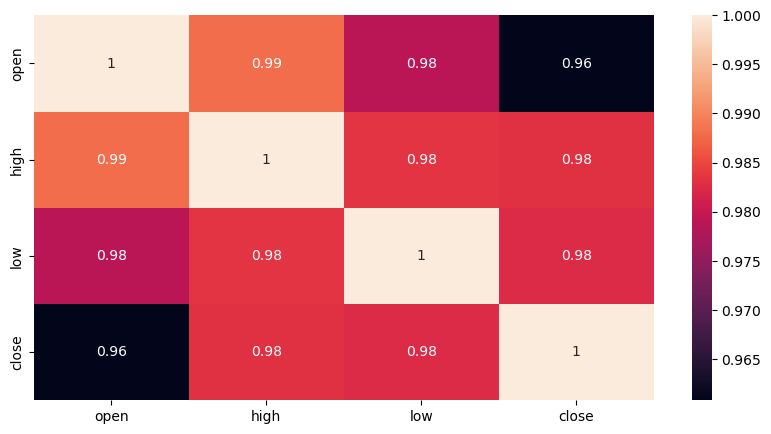

In [178]:
plt.rcParams["figure.figsize"] = (10,5)
sns.heatmap(Half_Yearly_stock.iloc[:,2:6].corr(),annot=True)

<Axes: >

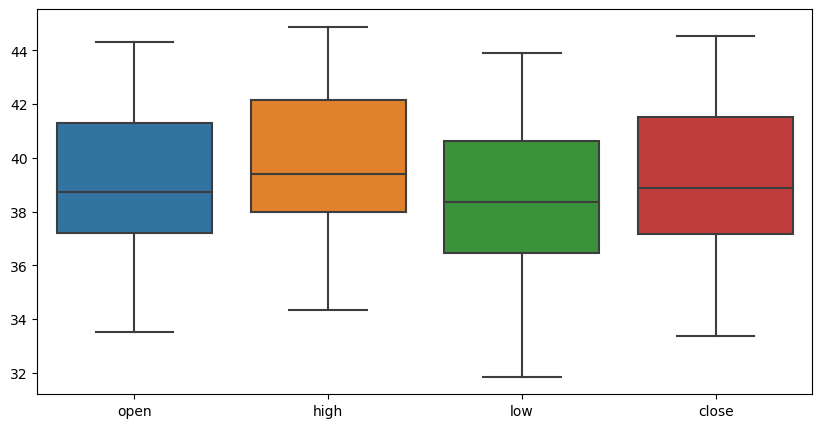

In [179]:
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot(Half_Yearly_stock.iloc[:,2:6])

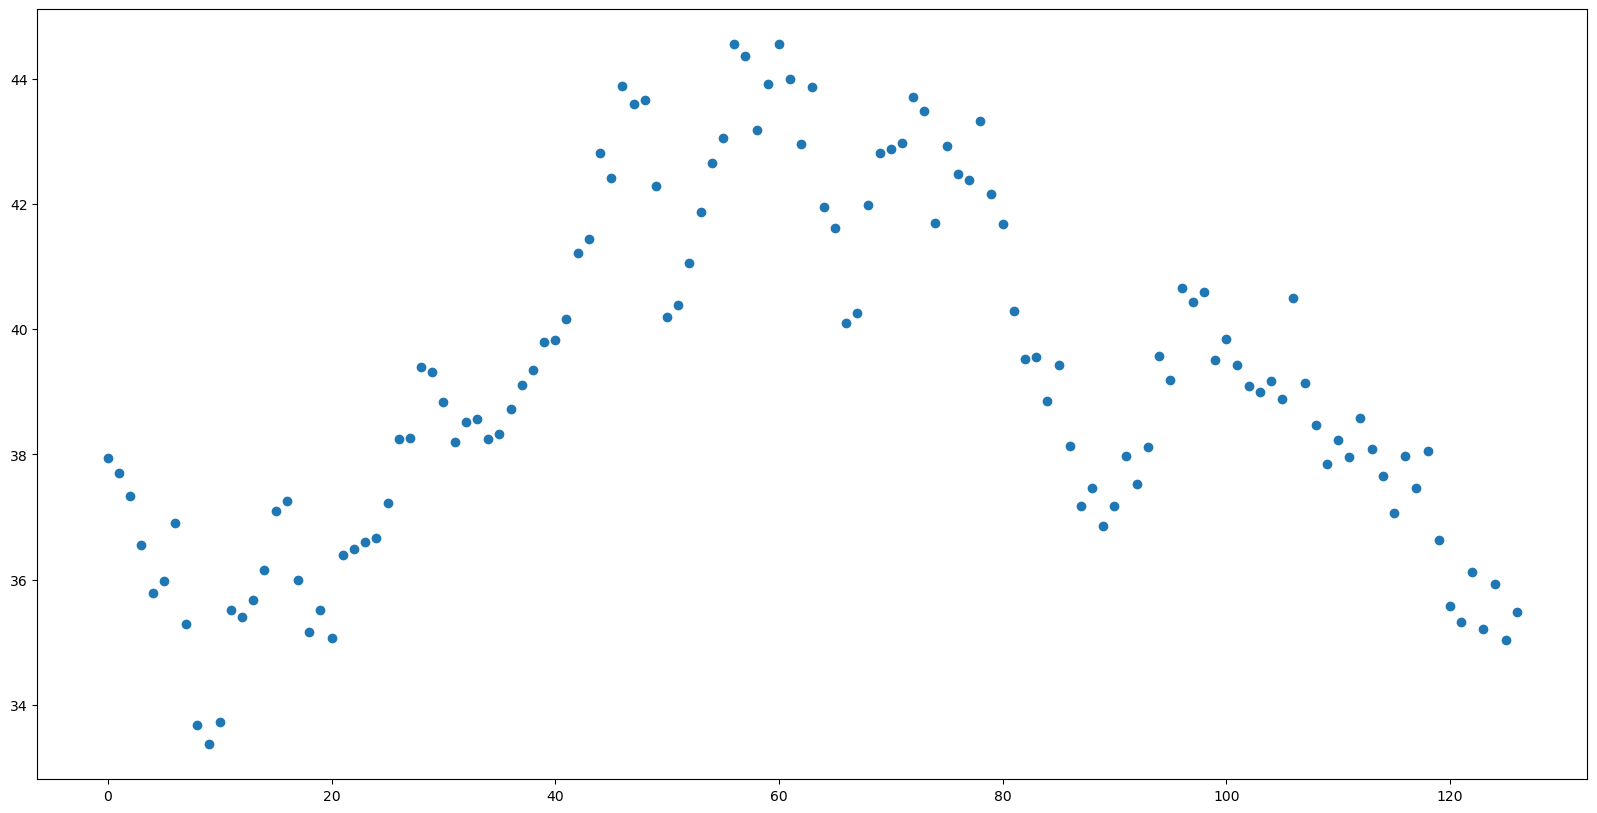

In [180]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(data=Half_Yearly_stock, x="sno", y="close",marker="o")

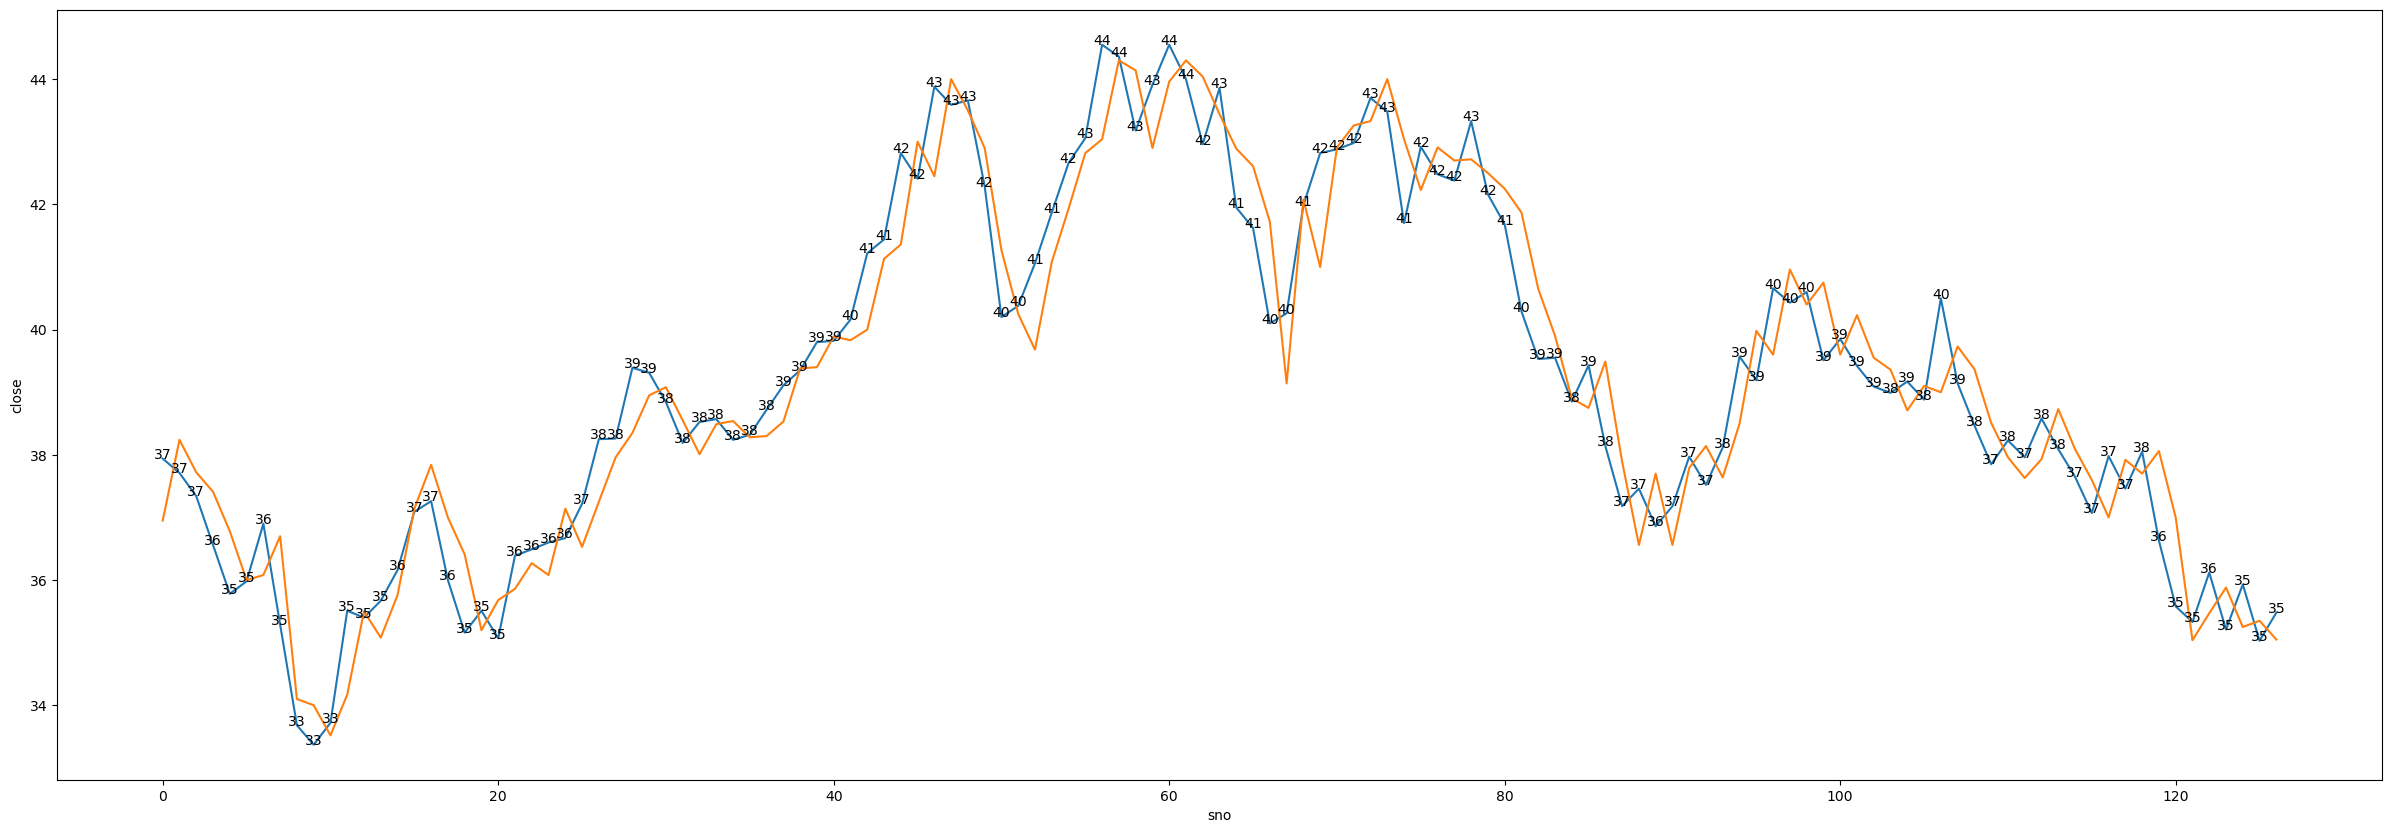

In [181]:
plt.rcParams["figure.figsize"] = (30,10)
Half_Yearly_stock_close = sns.lineplot(data=Half_Yearly_stock,x="sno",y="close")
for i, v in enumerate(Half_Yearly_stock["close"]):
    Half_Yearly_stock_close.text(i, v, "%d" %v, ha="center")
    
Half_Yearly_stock_open = sns.lineplot(data=Half_Yearly_stock,x="sno",y="open")
# for i, v in enumerate(Half_Yearly_stock["open"]):
#     Half_Yearly_stock_open.text(i, v, "%d" %v, ha="center")

In [182]:
Half_Yearly_stock.head(2)

,index,date,open,high,low,close,volume,Name,dd,mm,yy,sno
0,287,2014-04-01,36.95,38.19,36.85,37.94,11065541,AAL,1,4,2014,0
1,288,2014-04-02,38.24,38.90,37.48,37.71,12508405,AAL,2,4,2014,1


In [183]:
x=Half_Yearly_stock[["sno"]]
y=Half_Yearly_stock["close"]

In [184]:
from sklearn import linear_model
Half_Yearly_stock_model1 = linear_model.LinearRegression()
Half_Yearly_stock_model1.fit(x,y)

LinearRegression()

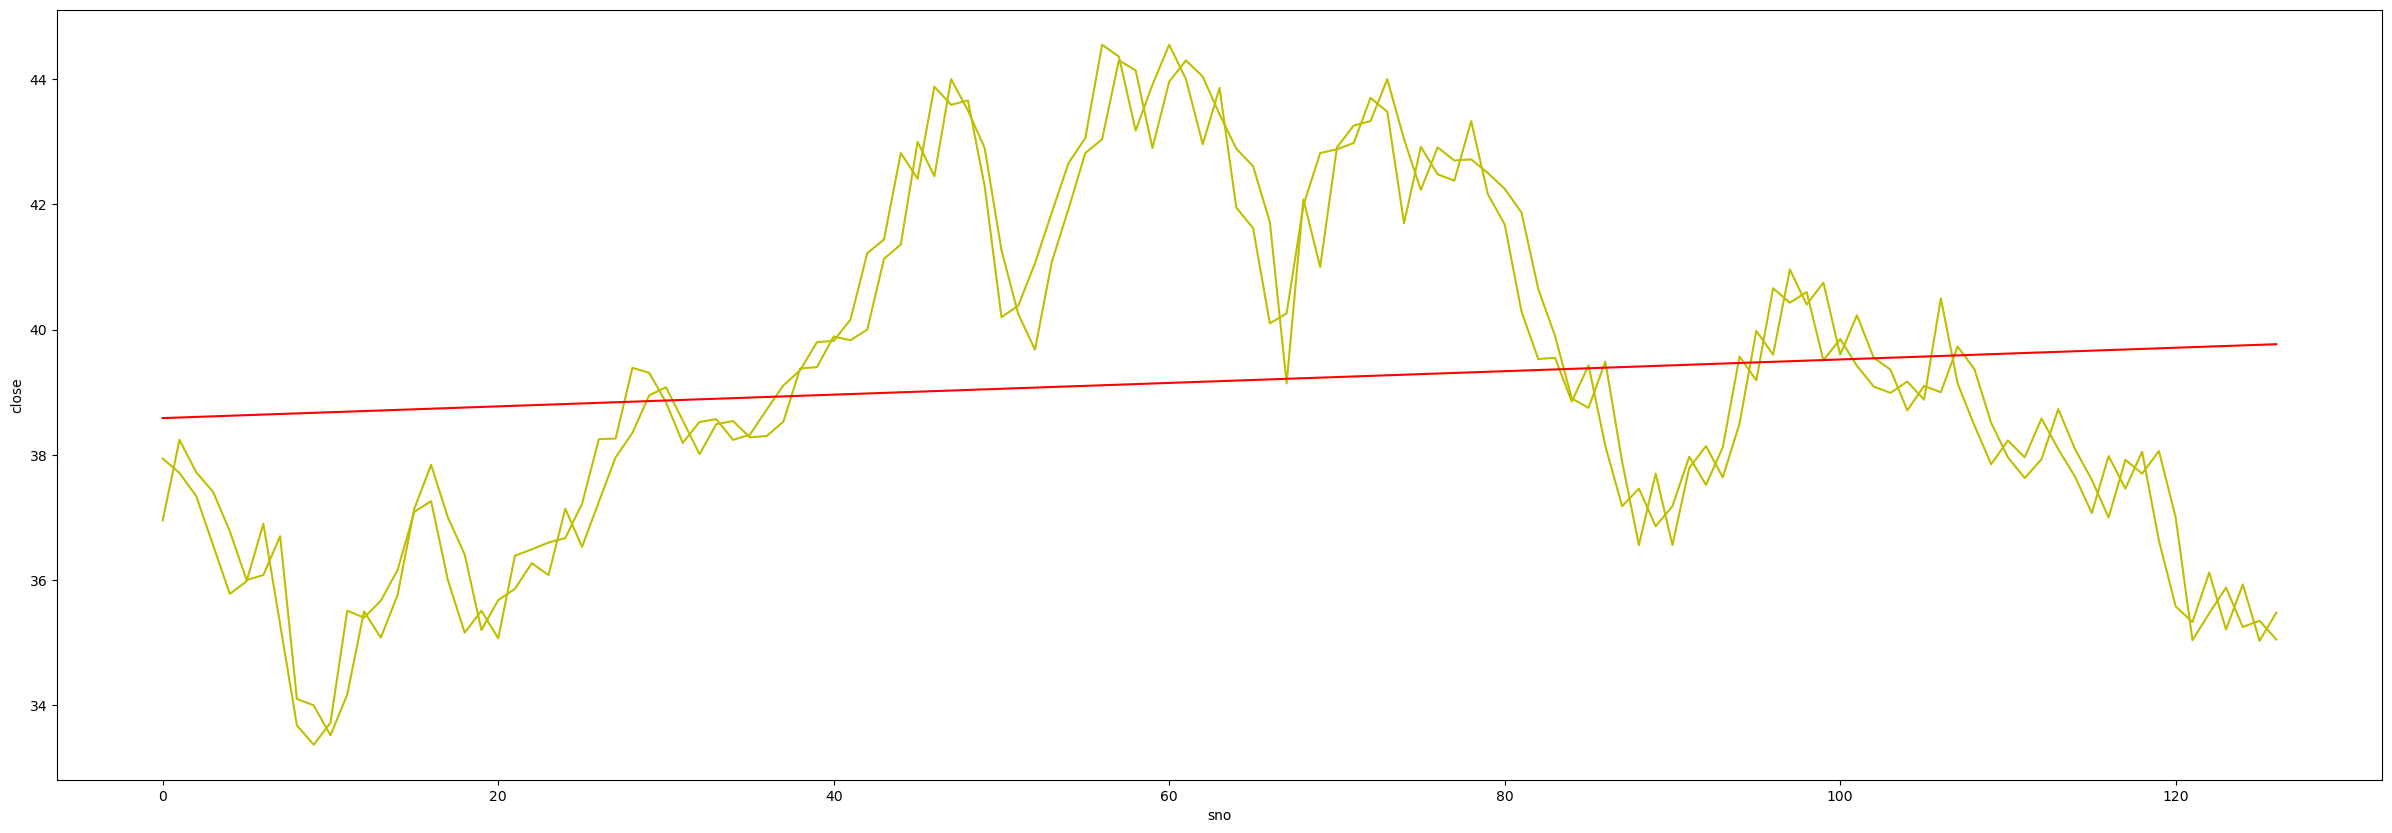

In [185]:
plt.rcParams["figure.figsize"] = (30,10)
Half_Yearly_stock_close = sns.lineplot(data=Half_Yearly_stock,x="sno",y="close",c="y")
Half_Yearly_stock_open = sns.lineplot(data=Half_Yearly_stock,x="sno",y="open",c="y")
plt.plot(Half_Yearly_stock["sno"],Half_Yearly_stock_model1.predict(x),c="r")

In [186]:
#errors
Half_Yearly_stock["pre"]=Half_Yearly_stock_model1.predict(x)
Half_Yearly_stock.head(5)

C:\Users\updes\AppData\Local\Temp\ipykernel_7304\2001636260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Half_Yearly_stock["pre"]=Half_Yearly_stock_model1.predict(x)


,index,date,open,high,low,close,volume,Name,dd,mm,yy,sno,pre
0,287,2014-04-01,36.95,38.19,36.8500,37.94,11065541,AAL,1,4,2014,0,38.586770
1,288,2014-04-02,38.24,38.90,37.4800,37.71,12508405,AAL,2,4,2014,1,38.596134
2,289,2014-04-03,37.72,38.44,36.9600,37.34,7939297,AAL,3,4,2014,2,38.605498
3,290,2014-04-04,37.41,37.72,36.3001,36.56,8733197,AAL,4,4,2014,3,38.614862
4,291,2014-04-07,36.78,37.48,35.4600,35.78,10577786,AAL,7,4,2014,4,38.624226


In [187]:
from sklearn.metrics import mean_squared_error 
# Calculation of Mean Squared Error (MSE) 
MSE=mean_squared_error(Half_Yearly_stock["close"],Half_Yearly_stock["pre"]) 
MSE

7.44018993267892

In [188]:
from sklearn.metrics import r2_score 
r2_score(Half_Yearly_stock["close"],Half_Yearly_stock["pre"]) 

0.015591782594190473

In [236]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree =9)
X_poly = poly_reg.fit_transform(x)

In [237]:
from sklearn import linear_model
Half_Yearly_stock_model2=linear_model.LinearRegression()
Half_Yearly_stock_model2.fit(X_poly,y)

LinearRegression()

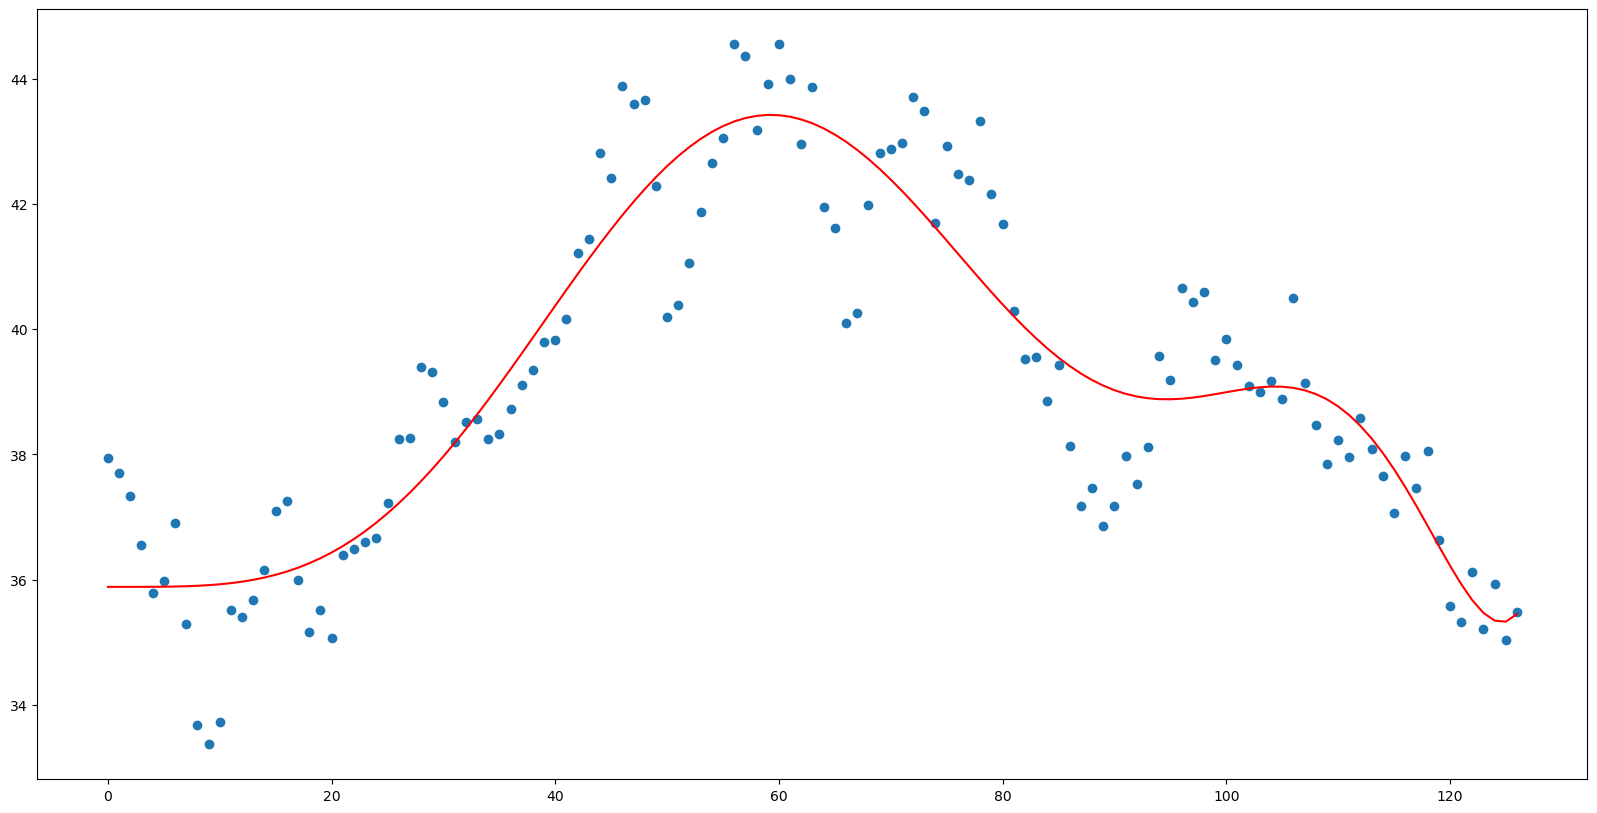

In [238]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(data=Half_Yearly_stock, x="sno", y="close",marker="o")
plt.plot(Half_Yearly_stock["sno"],Half_Yearly_stock_model2.predict(X_poly),c="red")

In [241]:
#errors
Half_Yearly_stock["pre2"]=Half_Yearly_stock_model2.predict(X_poly)
Half_Yearly_stock.head(5)

C:\Users\updes\AppData\Local\Temp\ipykernel_7304\1713849036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Half_Yearly_stock["pre2"]=Half_Yearly_stock_model2.predict(X_poly)


,index,date,open,high,low,close,volume,Name,dd,mm,yy,sno,pre,pre2
0,287,2014-04-01,36.95,38.19,36.8500,37.94,11065541,AAL,1,4,2014,0,38.586770,35.883965
1,288,2014-04-02,38.24,38.90,37.4800,37.71,12508405,AAL,2,4,2014,1,38.596134,35.883970
2,289,2014-04-03,37.72,38.44,36.9600,37.34,7939297,AAL,3,4,2014,2,38.605498,35.884038
3,290,2014-04-04,37.41,37.72,36.3001,36.56,8733197,AAL,4,4,2014,3,38.614862,35.884327
4,291,2014-04-07,36.78,37.48,35.4600,35.78,10577786,AAL,7,4,2014,4,38.624226,35.885097


In [243]:
from sklearn.metrics import mean_squared_error 
# Calculation of Mean Squared Error (MSE) 
MSE=mean_squared_error(Half_Yearly_stock["close"],Half_Yearly_stock["pre2"]) 
MSE

1.269166867787008

In [242]:
from sklearn.metrics import r2_score 
r2_score(Half_Yearly_stock["close"],Half_Yearly_stock["pre2"]) 

0.8320770967927601

<center class="alert alert-block alert-success"><h2> Analaysis of the year:<b>2014</b> </h2></center>

In [192]:
# extrecting data
yearly_stock=stock[(stock.yy==2014)&(stock["Name"]=="AAL")]
yearly_stock.head()

,date,open,high,low,close,volume,Name,dd,mm,yy
226,2014-01-02,25.07,25.8200,25.06,25.360,8998943,AAL,2,1,2014
227,2014-01-03,25.75,26.7500,25.51,26.540,13836062,AAL,3,1,2014
228,2014-01-06,26.62,27.2000,26.60,27.030,11272273,AAL,6,1,2014
229,2014-01-07,27.20,27.3997,26.67,26.905,11288775,AAL,7,1,2014
230,2014-01-08,26.37,27.6800,26.35,27.630,15736891,AAL,8,1,2014


In [193]:
yearly_stock.reset_index(inplace=True)
yearly_stock["sno"]=yearly_stock.index
yearly_stock.head()

C:\Users\updes\AppData\Local\Temp\ipykernel_7304\2273580198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_stock["sno"]=yearly_stock.index


,index,date,open,high,low,close,volume,Name,dd,mm,yy,sno
0,226,2014-01-02,25.07,25.8200,25.06,25.360,8998943,AAL,2,1,2014,0
1,227,2014-01-03,25.75,26.7500,25.51,26.540,13836062,AAL,3,1,2014,1
2,228,2014-01-06,26.62,27.2000,26.60,27.030,11272273,AAL,6,1,2014,2
3,229,2014-01-07,27.20,27.3997,26.67,26.905,11288775,AAL,7,1,2014,3
4,230,2014-01-08,26.37,27.6800,26.35,27.630,15736891,AAL,8,1,2014,4


In [194]:
yearly_stock.count()

index     252
date      252
open      252
high      252
low       252
close     252
volume    252
Name      252
dd        252
mm        252
yy        252
sno       252
dtype: int64

In [195]:
yearly_stock.iloc[:,2:6].corr()

,open,high,low,close
open,1.000000,0.995086,0.993851,0.988001
high,0.995086,1.000000,0.993848,0.995368
low,0.993851,0.993848,1.000000,0.994564
close,0.988001,0.995368,0.994564,1.000000


<Axes: >

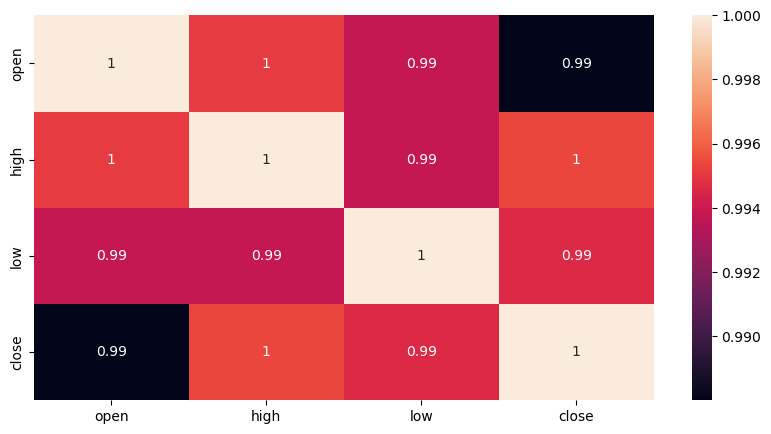

In [196]:
plt.rcParams["figure.figsize"] = (10,5)
sns.heatmap(yearly_stock.iloc[:,2:6].corr(),annot=True)

<Axes: >

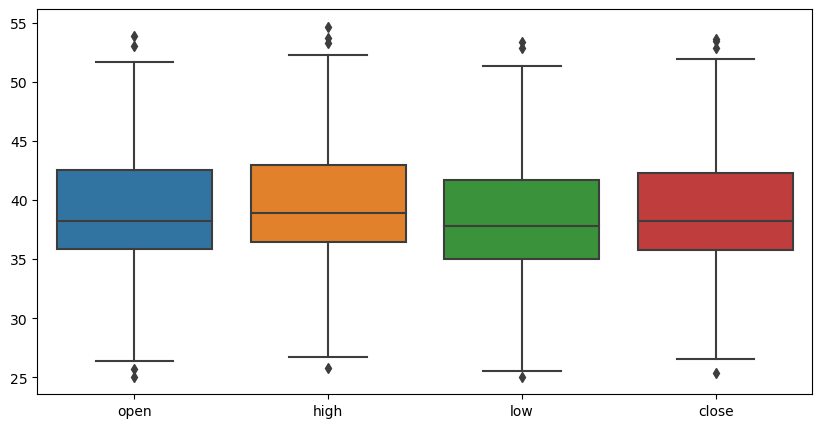

In [197]:
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot(yearly_stock.iloc[:,2:6])

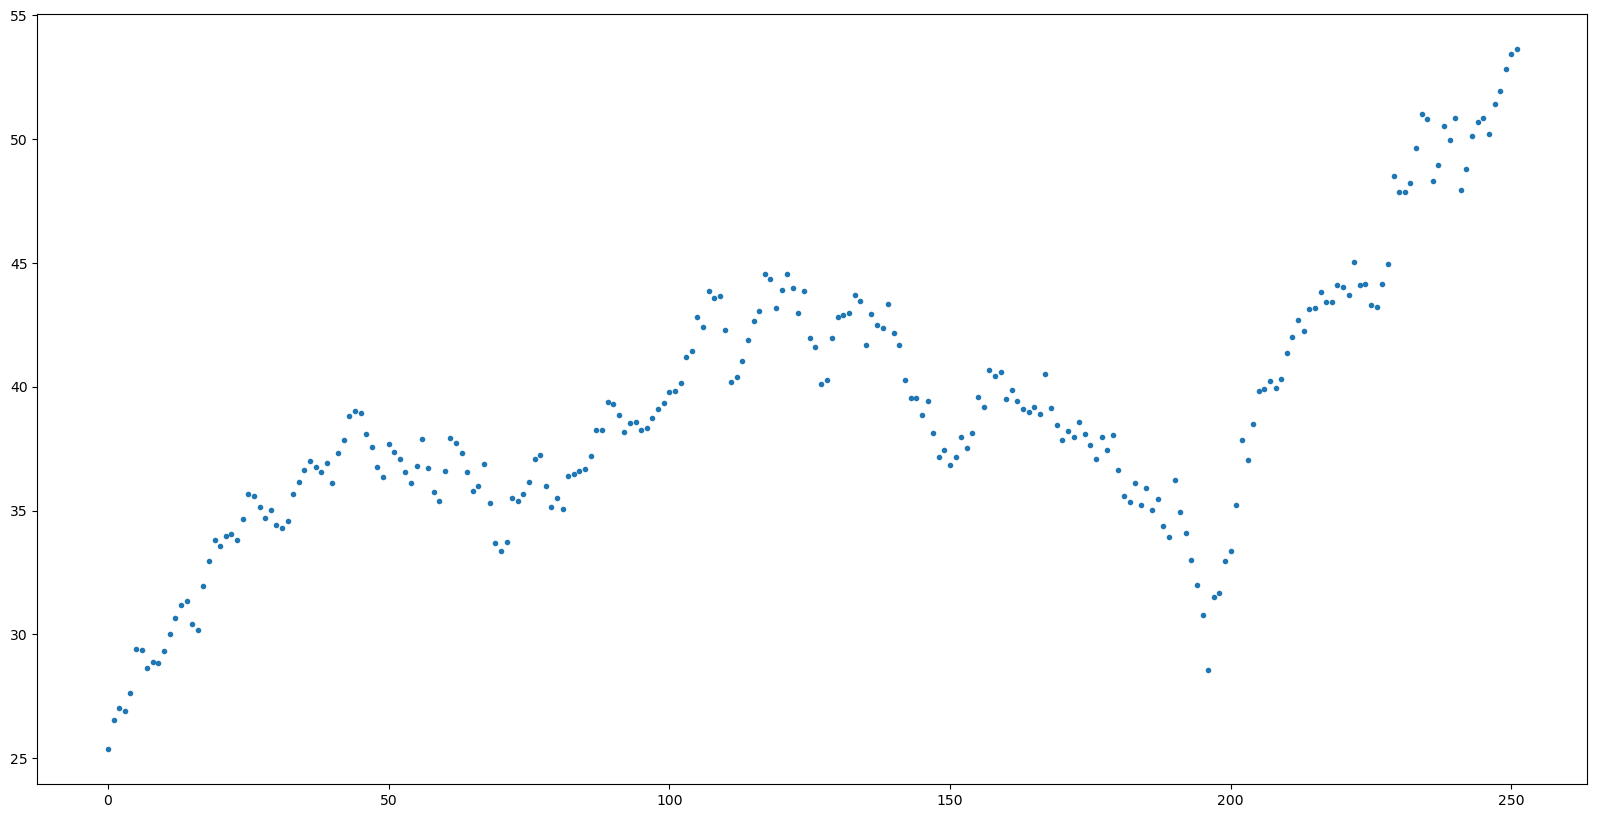

In [198]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(data=yearly_stock, x="sno", y="close",marker=".")

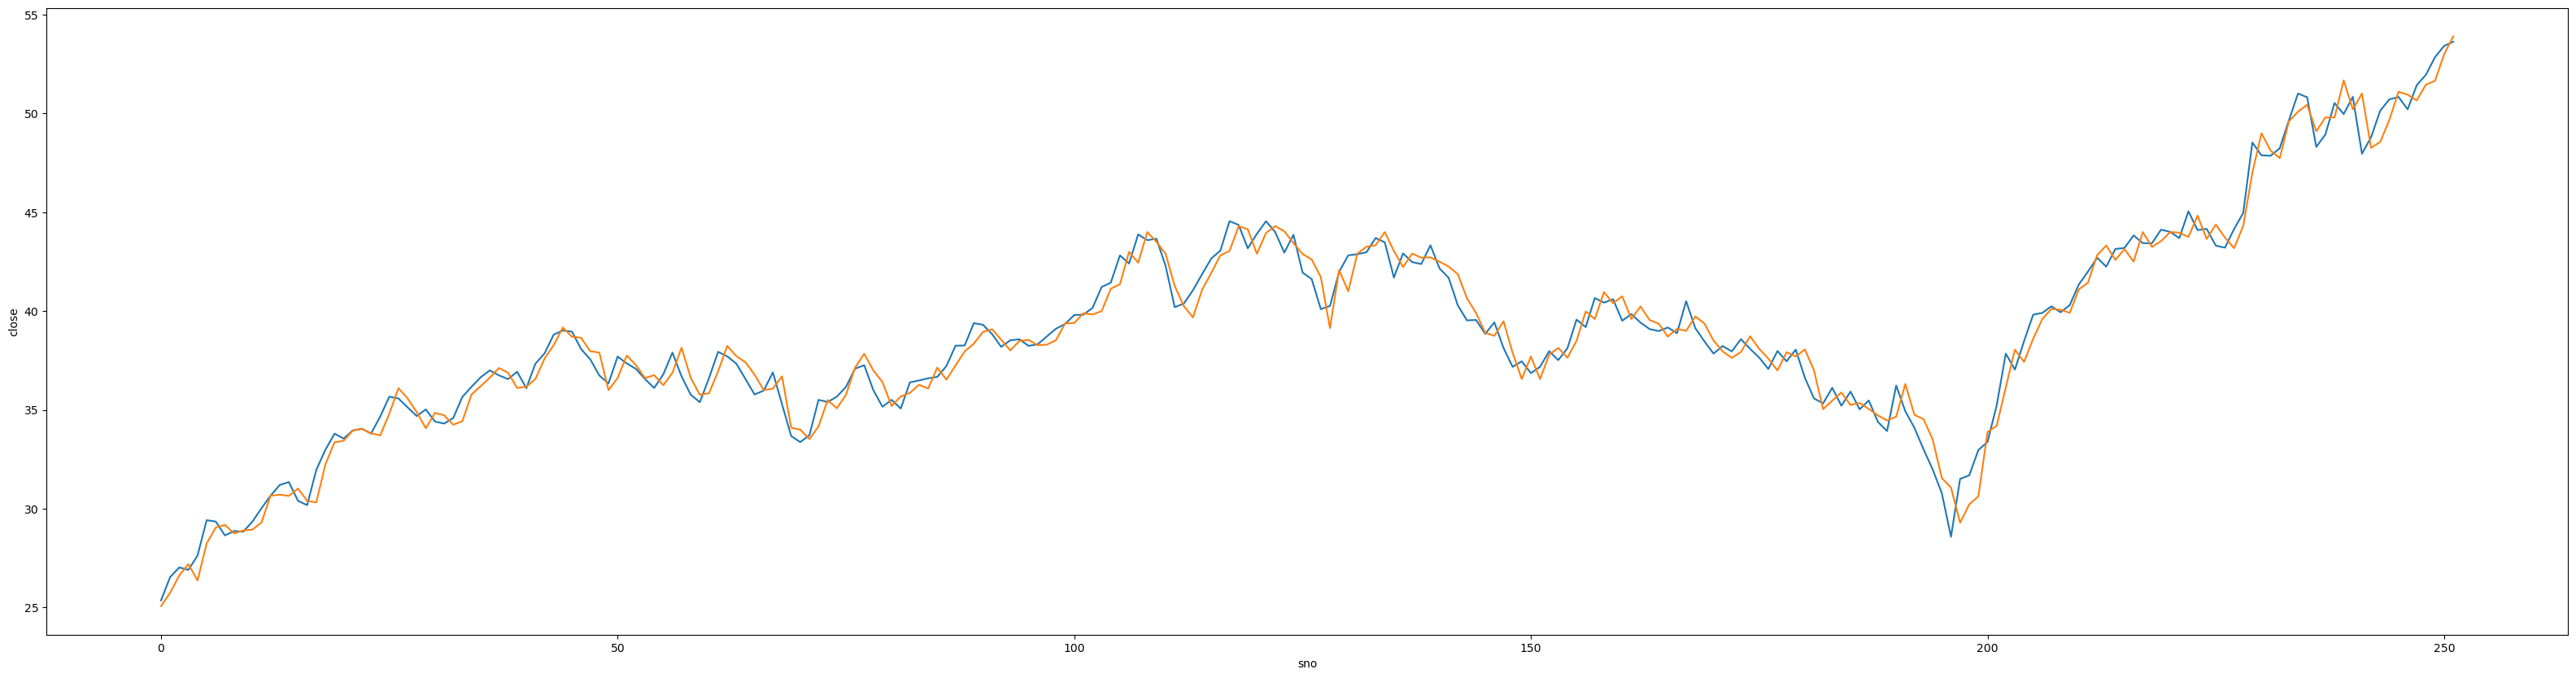

In [199]:
plt.rcParams["figure.figsize"] = (40,10)
yearly_stock_close = sns.lineplot(data=yearly_stock,x="sno",y="close")
    
yearly_stock_open = sns.lineplot(data=yearly_stock,x="sno",y="open")

<center class="alert alert-block alert-success"><h2> Analaysis of 3 years:<b>2014-16</b> </h2></center>

In [200]:
# extrecting data
threeyear_stock=stock[((stock.yy>2013)&(stock.yy<2017))&((stock["Name"]=="AAL"))]
threeyear_stock.head()

,date,open,high,low,close,volume,Name,dd,mm,yy
226,2014-01-02,25.07,25.8200,25.06,25.360,8998943,AAL,2,1,2014
227,2014-01-03,25.75,26.7500,25.51,26.540,13836062,AAL,3,1,2014
228,2014-01-06,26.62,27.2000,26.60,27.030,11272273,AAL,6,1,2014
229,2014-01-07,27.20,27.3997,26.67,26.905,11288775,AAL,7,1,2014
230,2014-01-08,26.37,27.6800,26.35,27.630,15736891,AAL,8,1,2014


In [201]:
threeyear_stock.reset_index(inplace=True)
threeyear_stock["sno"]=threeyear_stock.index
threeyear_stock.head()

C:\Users\updes\AppData\Local\Temp\ipykernel_7304\2281633757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threeyear_stock["sno"]=threeyear_stock.index


,index,date,open,high,low,close,volume,Name,dd,mm,yy,sno
0,226,2014-01-02,25.07,25.8200,25.06,25.360,8998943,AAL,2,1,2014,0
1,227,2014-01-03,25.75,26.7500,25.51,26.540,13836062,AAL,3,1,2014,1
2,228,2014-01-06,26.62,27.2000,26.60,27.030,11272273,AAL,6,1,2014,2
3,229,2014-01-07,27.20,27.3997,26.67,26.905,11288775,AAL,7,1,2014,3
4,230,2014-01-08,26.37,27.6800,26.35,27.630,15736891,AAL,8,1,2014,4


In [202]:
threeyear_stock.count()

index     756
date      756
open      756
high      756
low       756
close     756
volume    756
Name      756
dd        756
mm        756
yy        756
sno       756
dtype: int64

In [203]:
threeyear_stock.iloc[:,2:6].corr()

,open,high,low,close
open,1.000000,0.996365,0.995052,0.990474
high,0.996365,1.000000,0.995133,0.995881
low,0.995052,0.995133,1.000000,0.995689
close,0.990474,0.995881,0.995689,1.000000


<Axes: >

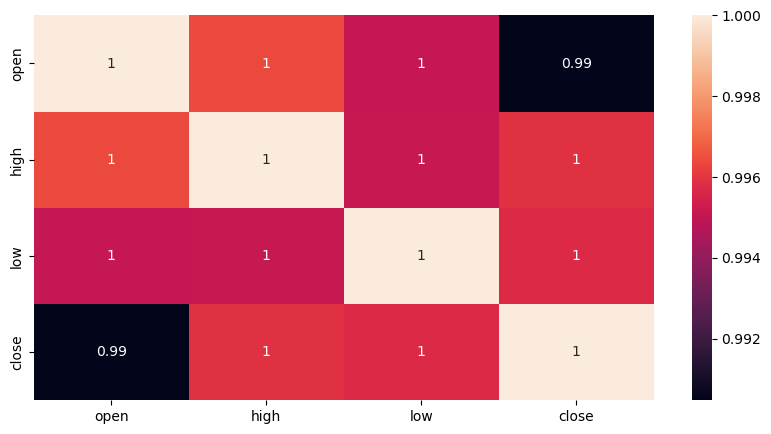

In [204]:
plt.rcParams["figure.figsize"] = (10,5)
sns.heatmap(threeyear_stock.iloc[:,2:6].corr(),annot=True)

<Axes: >

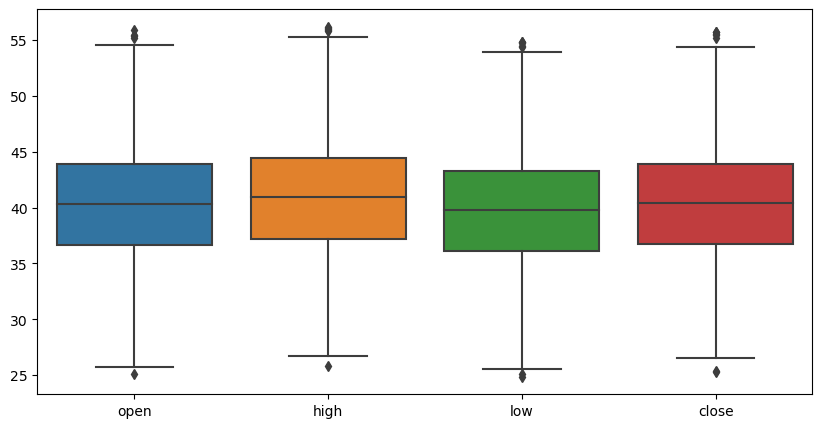

In [205]:
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot(threeyear_stock.iloc[:,2:6])

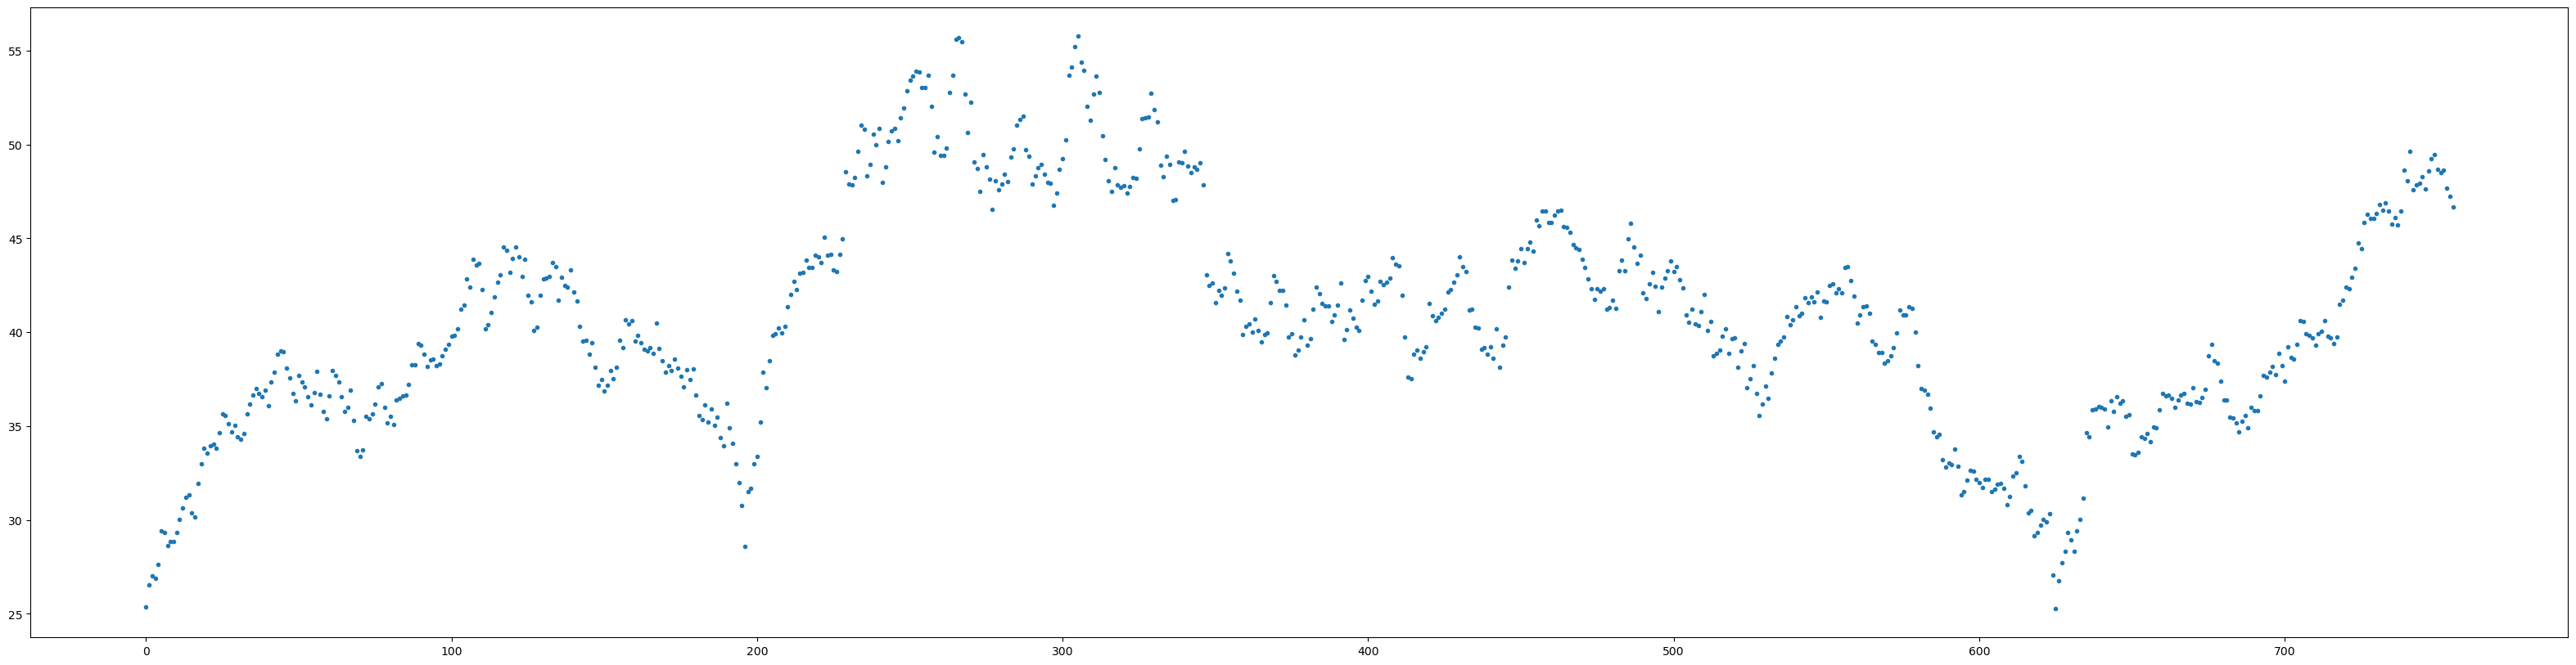

In [244]:
plt.rcParams["figure.figsize"] = (40,10)
plt.scatter(data=threeyear_stock, x="sno", y="close",marker=".")

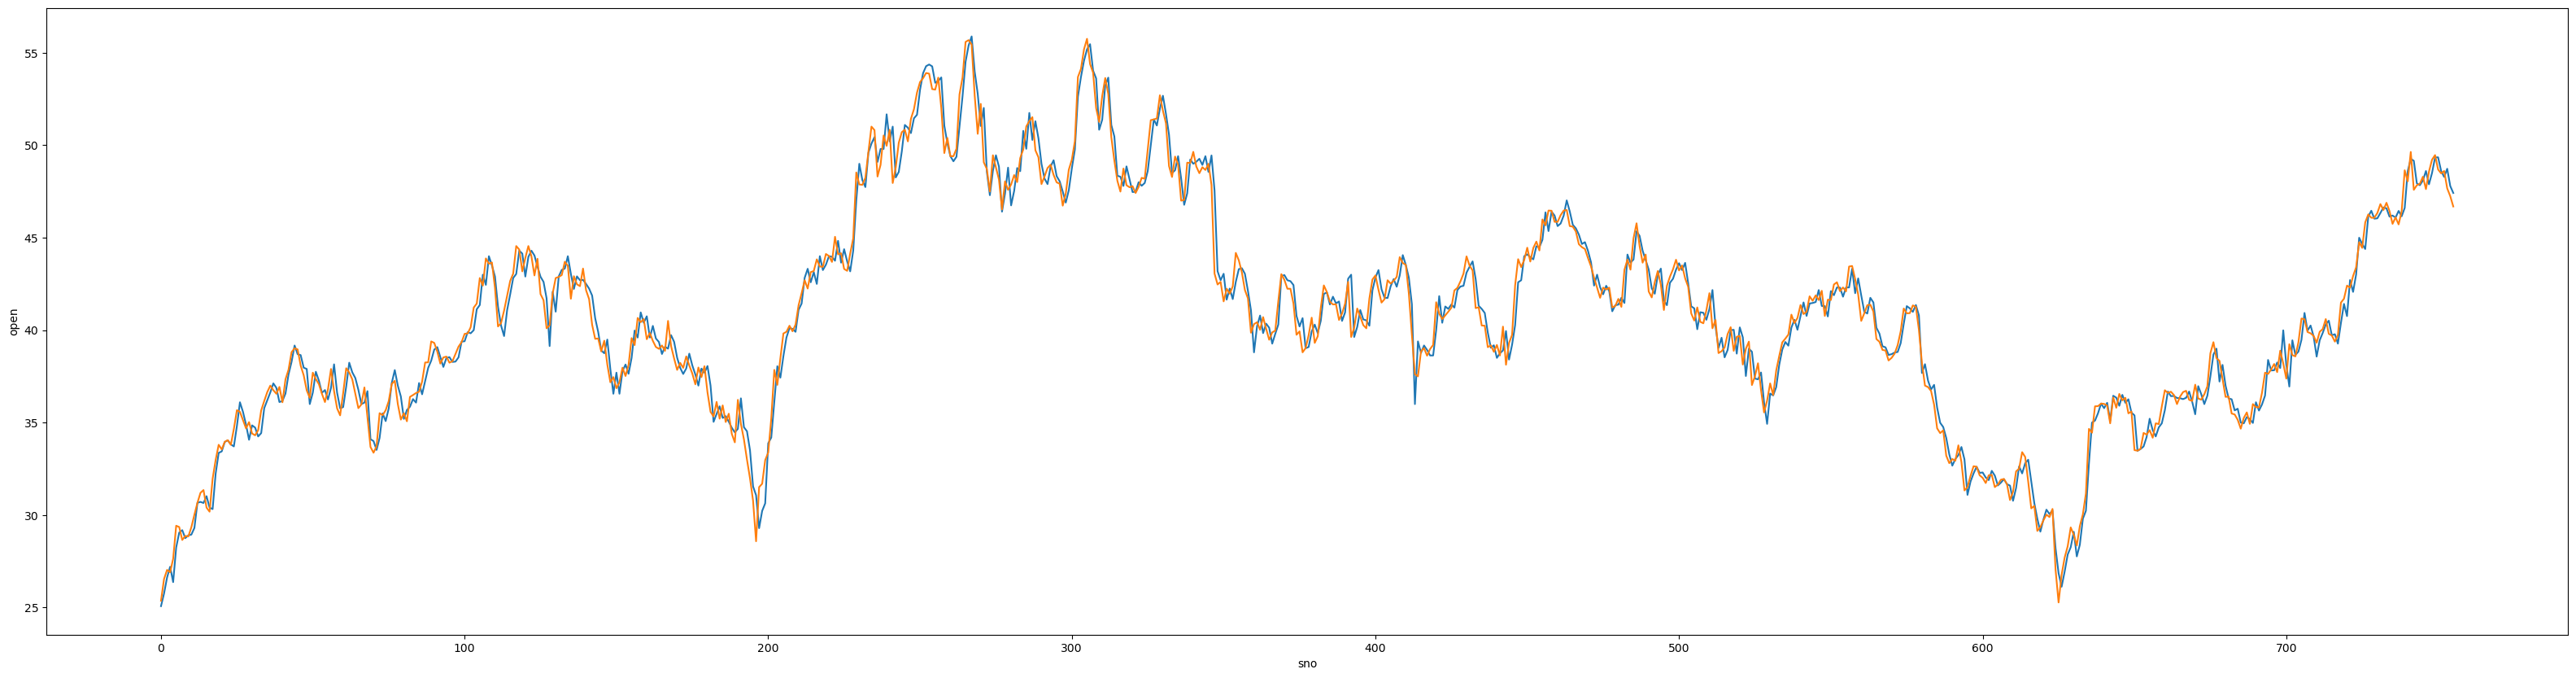

In [275]:
plt.rcParams["figure.figsize"] = (40,10)
threeyear_stock_open = sns.lineplot(data=threeyear_stock,x="sno",y="open")
threeyear_stock_close = sns.lineplot(data=threeyear_stock,x="sno",y="close")

In [248]:
xx=threeyear_stock[["sno"]]
yy=threeyear_stock["close"]

In [268]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree =7)
XX_poly = poly_reg.fit_transform(xx)

In [269]:
from sklearn import linear_model
threeyear_stock_model=linear_model.LinearRegression()
threeyear_stock_model.fit(XX_poly,yy)

LinearRegression()

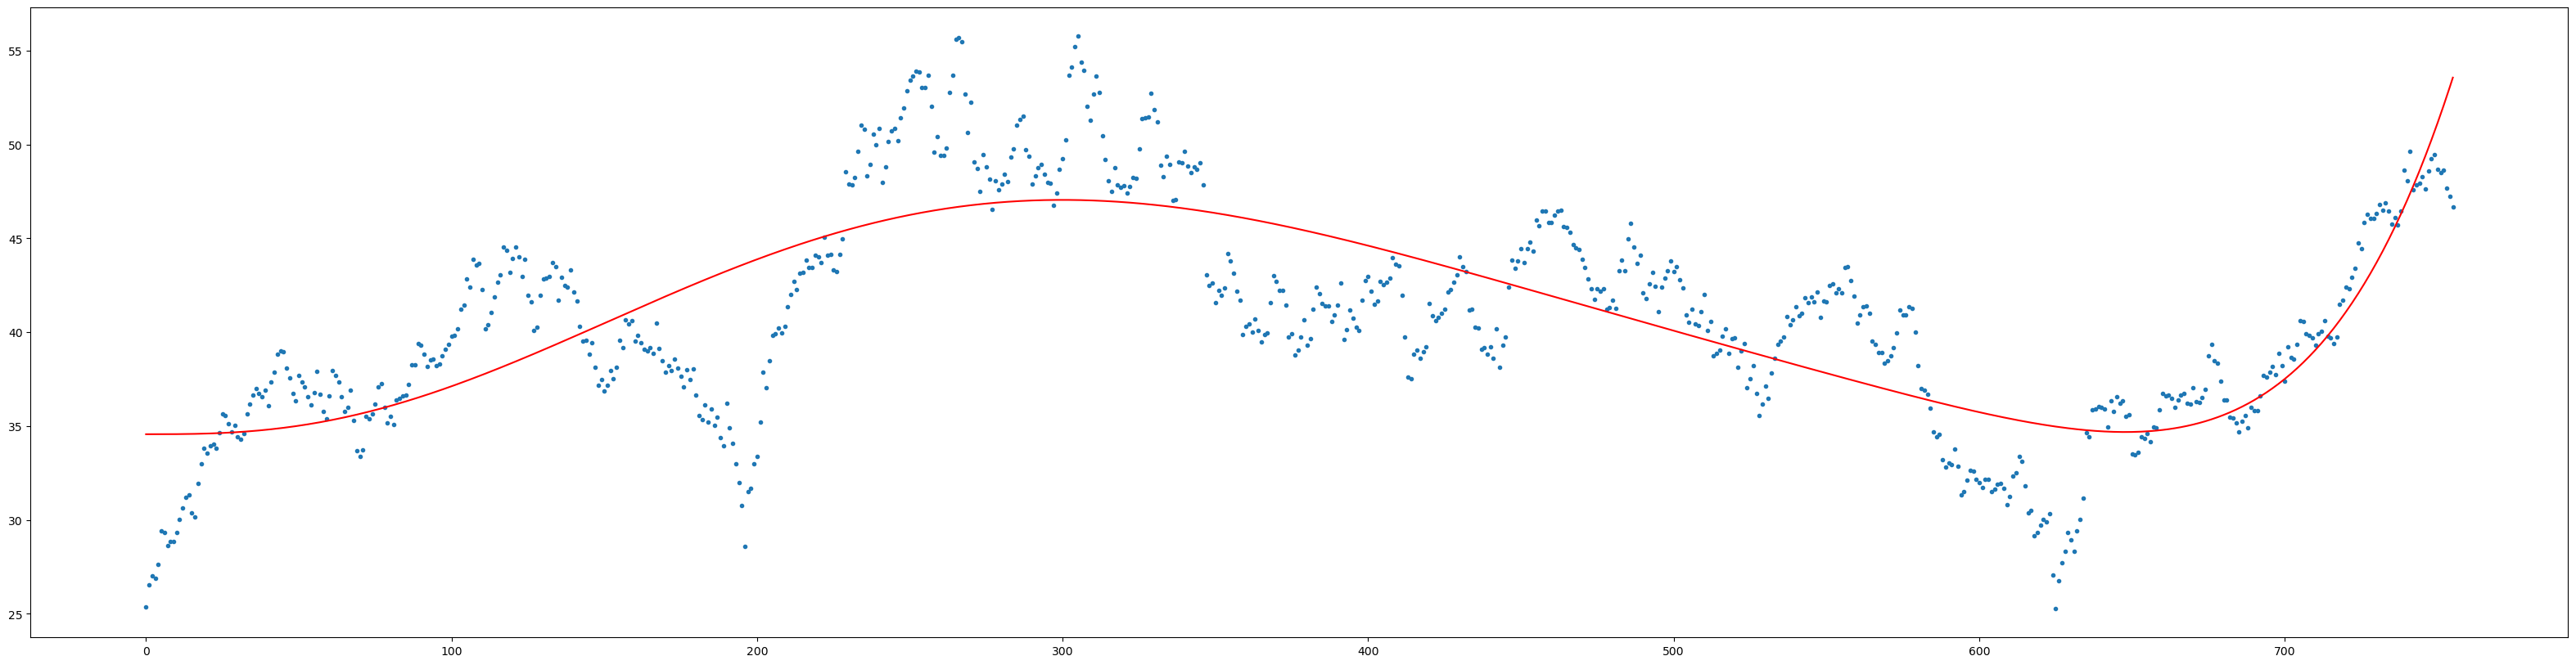

In [270]:
plt.rcParams["figure.figsize"] = (40,10)
plt.scatter(data=threeyear_stock, x="sno", y="close",marker=".")
plt.plot(threeyear_stock["sno"],threeyear_stock_model.predict(XX_poly),c="red")

In [271]:
threeyear_stock["pre"]=threeyear_stock_model.predict(XX_poly)
threeyear_stock.head()

C:\Users\updes\AppData\Local\Temp\ipykernel_7304\563142892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threeyear_stock["pre"]=threeyear_stock_model.predict(XX_poly)


,index,date,open,high,low,close,volume,Name,dd,mm,yy,sno,pre
0,226,2014-01-02,25.07,25.8200,25.06,25.360,8998943,AAL,2,1,2014,0,34.566193
1,227,2014-01-03,25.75,26.7500,25.51,26.540,13836062,AAL,3,1,2014,1,34.566198
2,228,2014-01-06,26.62,27.2000,26.60,27.030,11272273,AAL,6,1,2014,2,34.566232
3,229,2014-01-07,27.20,27.3997,26.67,26.905,11288775,AAL,7,1,2014,3,34.566326
4,230,2014-01-08,26.37,27.6800,26.35,27.630,15736891,AAL,8,1,2014,4,34.566506


In [272]:
from sklearn.metrics import r2_score 
r2_score(threeyear_stock["close"],threeyear_stock["pre"]) 

0.597852000629393